In [76]:
import pandas as pd
import numpy as np
from numpy.random import randn,randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
df = pd.DataFrame(randn(5,10), ['a', 'b', 'c', 'd', 'e'], ['r','s', 't','u', 'v', 'w', 'x', 'y', 'z','target col'])
df

,r,s,t,u,v,w,x,y,z,target col
a,-0.289414,-0.732515,-1.037014,0.954643,0.226359,-0.438568,0.126194,1.320362,0.960021,0.528970
b,-0.146917,0.630098,-0.644694,0.142828,0.125005,-0.264843,0.620336,-1.162708,-0.691889,-0.932665
c,0.314616,-0.258917,1.010675,1.479223,1.434173,0.692436,0.489311,-1.163171,0.644711,-0.973273
d,0.225519,0.181035,1.249005,0.182542,0.299350,0.333096,0.469738,-0.608397,-0.618832,-0.199511
e,-1.156618,-0.960919,-0.387761,-0.308488,-1.143194,-0.526123,1.431946,-0.754563,0.105746,-0.873203


In [77]:
df['target col'] = df[['target col']].floordiv(2).abs()
df

,r,s,t,u,v,w,x,y,z,target col
a,-0.289414,-0.732515,-1.037014,0.954643,0.226359,-0.438568,0.126194,1.320362,0.960021,0.0
b,-0.146917,0.630098,-0.644694,0.142828,0.125005,-0.264843,0.620336,-1.162708,-0.691889,1.0
c,0.314616,-0.258917,1.010675,1.479223,1.434173,0.692436,0.489311,-1.163171,0.644711,1.0
d,0.225519,0.181035,1.249005,0.182542,0.299350,0.333096,0.469738,-0.608397,-0.618832,1.0
e,-1.156618,-0.960919,-0.387761,-0.308488,-1.143194,-0.526123,1.431946,-0.754563,0.105746,1.0


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('target col',axis=1))

StandardScaler()

In [86]:
scaled_feature = scaler.transform(df.drop('target col',axis=1))
df_feat = pd.DataFrame(scaled_feature,columns=df.columns[:-1])
df_feat

,r,s,t,u,v,w,x,y,z
0,-0.150569,-0.865760,-1.170806,0.725931,0.046499,-0.839918,-1.154668,1.942324,1.333384
1,0.121533,1.473647,-0.743544,-0.542810,-0.077457,-0.473084,-0.016512,-0.745954,-1.169408
2,1.002838,-0.052661,1.059261,1.545768,1.523653,1.548287,-0.318302,-0.746456,0.855662
3,0.832706,0.702671,1.318817,-0.480742,0.135767,0.789511,-0.363383,-0.145834,-1.058719
4,-1.806509,-1.257897,-0.463728,-1.248146,-1.628462,-1.024797,1.852864,-0.304080,0.039081


In [87]:
x= df_feat
y= df['target col']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(x_train,y_train)
pred = knc.predict(x_test)
pred

array([1., 1.])

In [89]:
cm = confusion_matrix(y_test, pred)
cm

array([[0, 1],
       [0, 1]], dtype=int64)

In [90]:
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\zxc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zxc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zxc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [97]:
error_rate = []
for i in range(1,4):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train,y_train)
    pred_i = knc.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))


In [98]:
error_rate

[0.5, 0.5, 0.5]

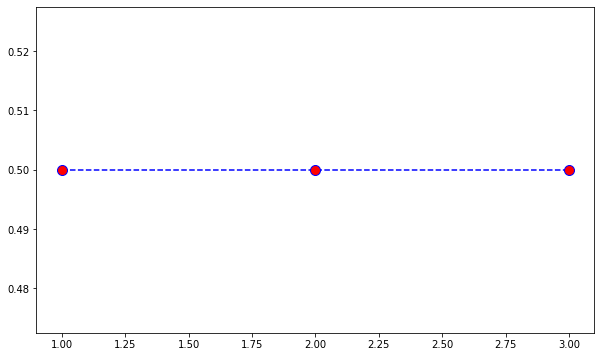

In [100]:
plt.figure(figsize=(10,6))
plt.plot(range(1,4),error_rate,color='blue',ls='dashed',marker='o',markerfacecolor='red',markersize=10)